# Package loading and basic configurations

In [37]:
%reload_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd


from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [38]:
bbox = BboxSelector([
    6.8, # min_x
    51.0, # min_y
    8.9, # max_x
    52.2  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
track_df

,id,time,geometry,Consumption.value,Consumption.unit,Intake Pressure.value,Intake Pressure.unit,GPS Altitude.value,GPS Altitude.unit,Engine Load.value,...,sensor.id,sensor.fuelType,sensor.constructionYear,sensor.manufacturer,GPS PDOP.value,GPS PDOP.unit,GPS VDOP.value,GPS VDOP.unit,GPS HDOP.value,GPS HDOP.unit
0,5e8ea6ff65b80c5d6bd4d7d7,2020-04-08T10:26:02,POINT (7.77562 51.66562),1.842269,l/h,40.999999,kPa,101.479695,m,35.979184,...,5c93d26a44ea8503020fd5ef,gasoline,2005,KIA,NaN,NaN,NaN,NaN,NaN,NaN
1,5e8ea6ff65b80c5d6bd4d7d9,2020-04-08T10:26:07,POINT (7.77666 51.66562),2.808972,l/h,59.000001,kPa,103.439300,m,52.609092,...,5c93d26a44ea8503020fd5ef,gasoline,2005,KIA,NaN,NaN,NaN,NaN,NaN,NaN
2,5e8ea6ff65b80c5d6bd4d7da,2020-04-08T10:26:13,POINT (7.77775 51.66563),1.737315,l/h,37.000001,kPa,102.729004,m,31.372550,...,5c93d26a44ea8503020fd5ef,gasoline,2005,KIA,NaN,NaN,NaN,NaN,NaN,NaN
3,5e8ea6ff65b80c5d6bd4d7db,2020-04-08T10:26:18,POINT (7.77881 51.66564),1.708456,l/h,37.000000,kPa,102.824218,m,31.996800,...,5c93d26a44ea8503020fd5ef,gasoline,2005,KIA,NaN,NaN,NaN,NaN,NaN,NaN
4,5e8ea6ff65b80c5d6bd4d7dc,2020-04-08T10:26:23,POINT (7.77985 51.66564),1.730519,l/h,38.000000,kPa,102.669197,m,32.080061,...,5c93d26a44ea8503020fd5ef,gasoline,2005,KIA,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,5e70bd9c77e02d42aaa8b0e3,2020-03-17T10:44:04,POINT (7.80962 51.68083),0.716590,l/h,26.848027,kPa,111.654468,m,22.325517,...,5c93d26a44ea8503020fd5ef,gasoline,2005,KIA,NaN,NaN,NaN,NaN,NaN,NaN
119,5e70bd9c77e02d42aaa8b0e4,2020-03-17T10:44:09,POINT (7.80946 51.68065),0.710206,l/h,22.648648,kPa,111.851680,m,18.507547,...,5c93d26a44ea8503020fd5ef,gasoline,2005,KIA,NaN,NaN,NaN,NaN,NaN,NaN
120,5e70bd9c77e02d42aaa8b0e5,2020-03-17T10:44:14,POINT (7.80935 51.68056),1.099258,l/h,46.429838,kPa,112.033812,m,42.160912,...,5c93d26a44ea8503020fd5ef,gasoline,2005,KIA,NaN,NaN,NaN,NaN,NaN,NaN
121,5e70bd9c77e02d42aaa8b0e6,2020-03-17T10:44:19,POINT (7.80912 51.68042),0.960073,l/h,30.244241,kPa,112.090095,m,25.015640,...,5c93d26a44ea8503020fd5ef,gasoline,2005,KIA,500.00006,precision,500.00006,precision,500.00006,precision


# Visualization using MatPlotlib package:

Using the matplotlib package I have created a histogram for the Intake Pressure value. And the result shows that for approximately more the 2000 points the pressure ranges from approximately 20 to 35 kPa and so on.

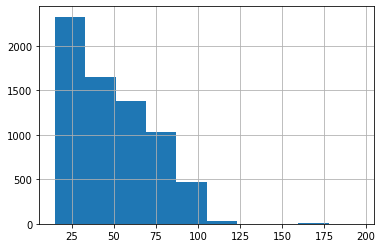

In [39]:
import matplotlib.pyplot as plt
track_df['Intake Pressure.value'].hist()
plt.show()

# Statistics:

Using pandas summarized the count, mean, standard deviation and IQR values of all the columns using describe().

In [47]:
print(df.describe())


       Consumption.value  Intake Pressure.value  GPS Altitude.value  \
count        6895.000000            6895.000000         7301.000000   
mean            4.147408              49.632007          101.956874   
std             4.213418              22.815643           17.987828   
min            -1.090800              14.717986           34.999999   
25%             1.086364              30.897191           95.994019   
50%             2.103306              43.137254          105.678663   
75%             5.628977              67.670191          111.107604   
max            23.596627             195.828742          183.000000   

       Engine Load.value  Speed.value  Calculated MAF.value    CO2.value  \
count        6938.000000  6939.000000           6895.000000  6895.000000   
mean           39.421117    52.263406             12.616761     9.746409   
std            23.287482    41.371893             12.817569     9.901533   
min          -495.792866    -1.721116             -3.318

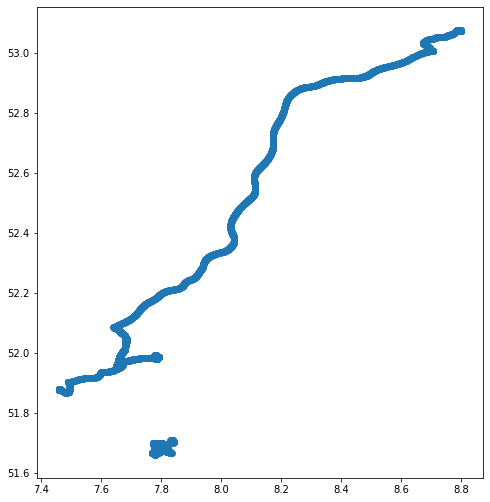

In [3]:
track_df.plot(figsize=(8, 10))

# Inspecting a single Track

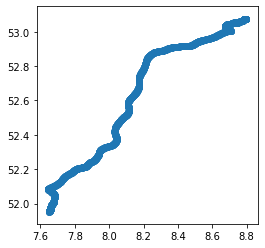

In [4]:
some_track_id = track_df['track.id'].unique()[9]
some_track = track_df[track_df['track.id'] == some_track_id]
some_track.plot()

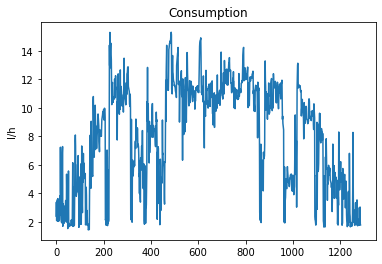

In [5]:
ax = some_track['Consumption.value'].plot()
ax.set_title("Consumption")
ax.set_ylabel(some_track['Consumption.unit'][0])
ax

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [55]:
import folium

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat, avg_lngs], zoom_start=13)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='blue').add_to(m)
m